In [2]:
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv("data/clean_data.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
396480,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
396481,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
396482,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
396483,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
# Tomamos una muestra aleatoria de los datos, por ejemplo, el 10%
df_sample = df.sample(frac=0.1, random_state=42)

df_sample['total_spent'] = df['Quantity'] * df['UnitPrice']

# Agrupamos por cliente (CustomerID)
df_clientes = df_sample.groupby('CustomerID').agg({
    'total_spent': 'sum',  # Total gastado por cliente
    'InvoiceNo': 'nunique',  # Número de compras únicas
    'Quantity': 'sum',  # Total de productos comprados
}).reset_index()



In [5]:
'''# Tomamos una muestra aleatoria de los datos, por ejemplo, el 10%
df_sample = df.sample(frac=0.1, random_state=42)

# Ahora seleccionamos las columnas para el clustering de la muestra
df_sample_clustering = df_sample[['Quantity', 'UnitPrice']]'''

"# Tomamos una muestra aleatoria de los datos, por ejemplo, el 10%\ndf_sample = df.sample(frac=0.1, random_state=42)\n\n# Ahora seleccionamos las columnas para el clustering de la muestra\ndf_sample_clustering = df_sample[['Quantity', 'UnitPrice']]"

In [6]:
# Estandarizar los datos antes de realizar clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clientes[['total_spent', 'InvoiceNo', 'Quantity']])

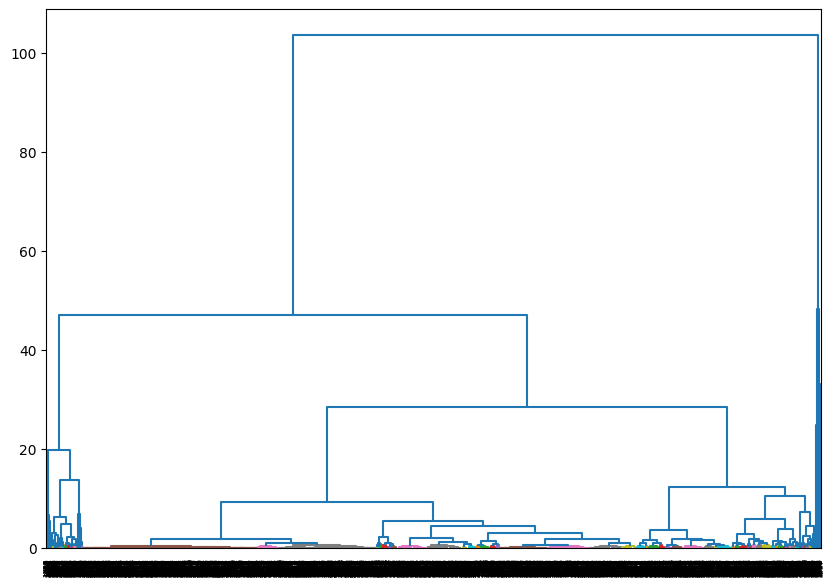

In [7]:
# Realizar el linkage para el clustering jerárquico
Z = linkage(df_scaled, method='ward', metric='euclidean')

# Dibuja el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z, color_threshold=0.7)
plt.show()

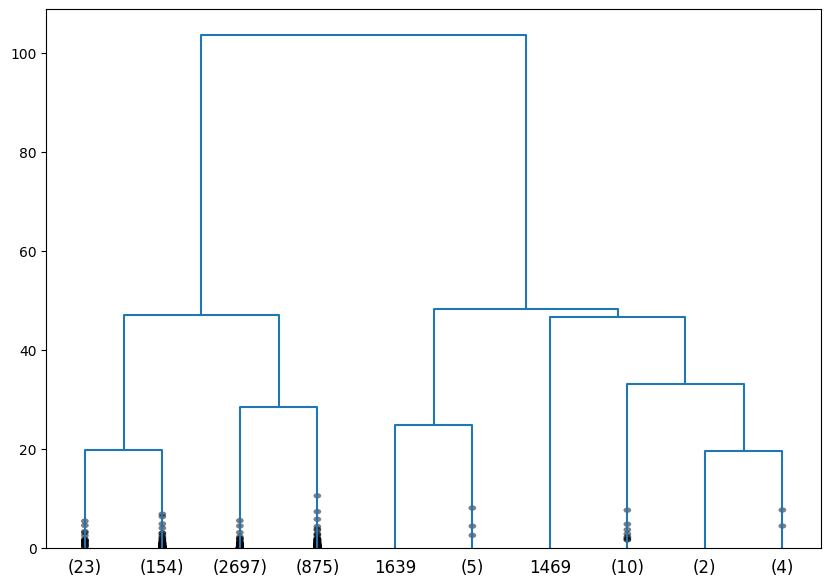

In [8]:
#Truncar el dendrograma

# Dibuja el dendrograma truncado
plt.figure(figsize=(10, 7))
dendrogram(Z, color_threshold=0.7, truncate_mode="lastp", p=10, show_leaf_counts=True, show_contracted=True)
plt.show()

In [9]:
#Dendrograma personalizado

def dendrogram_tune(*args,**kwargs):
    max_d=kwargs.pop("max_d", None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above", 0)

    ddata = dendrogram(*args,**kwargs)


    if not kwargs.get("no_plot", False):
        plt.title("Clustering_jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata["icoord"], ddata["dcoord"], ddata["color_list"]):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x, y, "o", c=c)
                plt.annotate("%.3g"%y, (x, y), xytext=(0, -5), textcoords="offset points", va="top", ha="center")
    
    if max_d:
        plt.axhline(y=max_d, c="k")
    
    return ddata


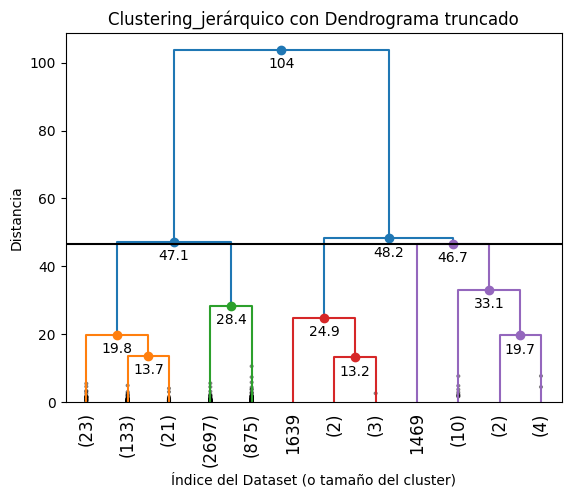

In [10]:
dendrogram_tune(Z,truncate_mode="lastp",p=12,leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10, max_d=46.7)
plt.show()

In [11]:
#corte automático del dendrograma
#inconsistency_i = (h_i-avg(h_j))/std(h_j)

from scipy.cluster.hierarchy import inconsistent

In [12]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 6.01075074,  3.70193736,  7.        ,  2.07420387],
       [ 9.70562557,  7.08195451,  4.        ,  1.40851524],
       [ 9.07600257,  5.59716986,  7.        ,  1.92331237],
       [12.67439678,  8.90979294,  4.        ,  1.37402541],
       [10.25597542,  8.87348546,  7.        ,  2.04911658],
       [12.31926165, 10.61007886,  7.        ,  1.96216012],
       [27.23769999, 16.18872555,  4.        ,  1.20095778],
       [19.63346516, 14.12532287,  7.        ,  1.94711812],
       [33.23142272, 14.80932375,  5.        ,  1.01351368],
       [45.55629565, 28.18077615,  7.        ,  2.06110423]])

In [13]:
import numpy as np

[103.63981258  48.24087485  47.13713723  46.67967595  33.13793524
  28.4387816   24.9166787   19.84110861  19.68066641  13.68932355]


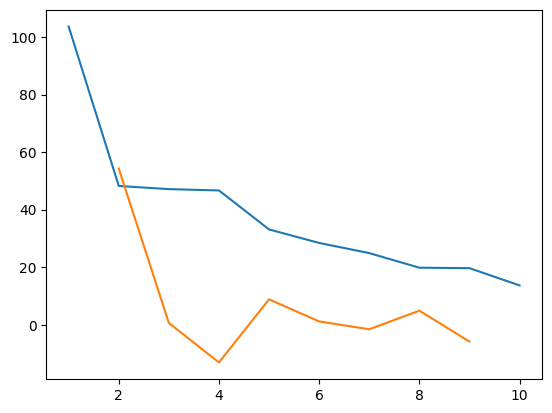

El número óptimo de clusters es 2


'La raya de color naranja nos muestra el icremento más elevada entre clusters(empezando desde el útlimo). En el segundo cluster empezando por arriba es donde hay mayor diferencia '

In [14]:
#Método del codo
last = Z[-10:, 2] #últimas 10 distancias y 2 indicamos que solo queremos la segunda columna(distáncias)

#Los visualizamos al revés
last_rev = last[::-1]
print(last_rev)

#Creamos el gráfico del codo
idx = np.arange(1, len(last) + 1)
plt.plot(idx, last_rev)

#Medimos la aceleración
acc = np.diff(last, 2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)#Mostraremos del 2 al 9 para que queden representadas los incrementos o decrementos de diferencias entre alturas de formación de un clustering o otro
plt.show()
k = acc_rev.argmax() + 2
print("El número óptimo de clusters es %s"%str(k))

'''La raya de color naranja nos muestra el icremento más elevada entre clusters(empezando desde el útlimo). En el segundo cluster empezando por arriba es donde hay mayor diferencia '''

In [15]:
from scipy.cluster.hierarchy import fcluster

k=4
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, ..., 2, 1, 2], dtype=int32)

In [16]:
fcluster(Z, 20, depth=10)

array([3, 2, 2, ..., 2, 1, 2], dtype=int32)

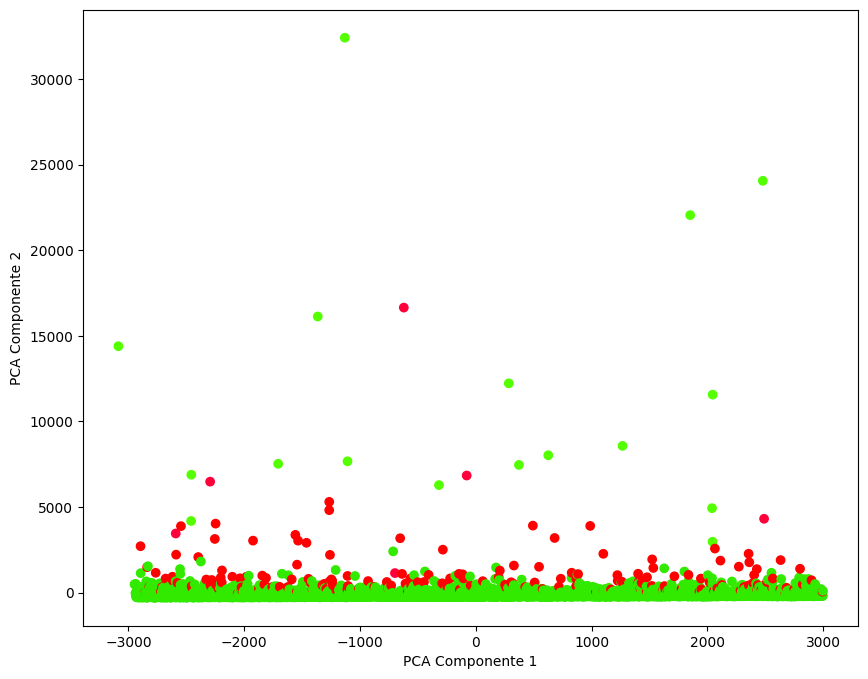

In [17]:
from sklearn.decomposition import PCA

# Reducción de la dimensionalidad a 2 dimensiones
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_clientes)

# Graficando
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap="prism")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.show()

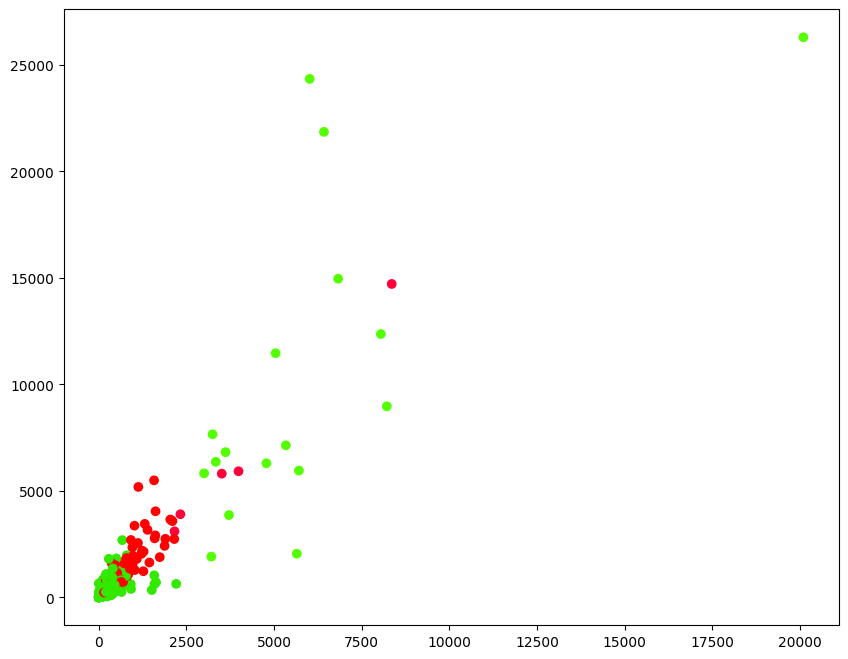

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(df_clientes["Quantity"], df_clientes["total_spent"], c=clusters, cmap="prism")
plt.show()


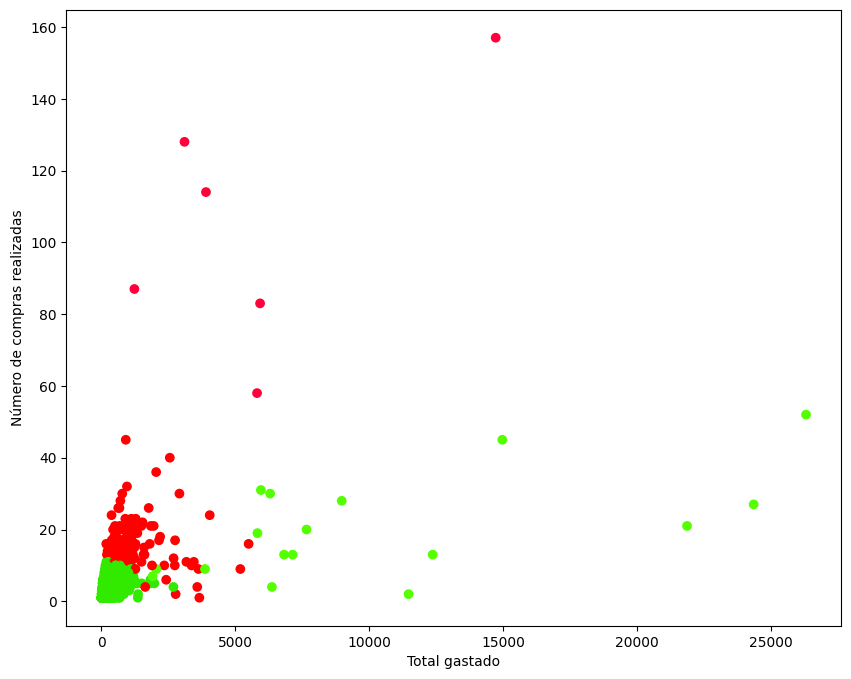

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(df_clientes["total_spent"], df_clientes["InvoiceNo"], c=clusters, cmap="prism")
plt.xlabel("Total gastado")
plt.ylabel("Número de compras realizadas")
plt.show()

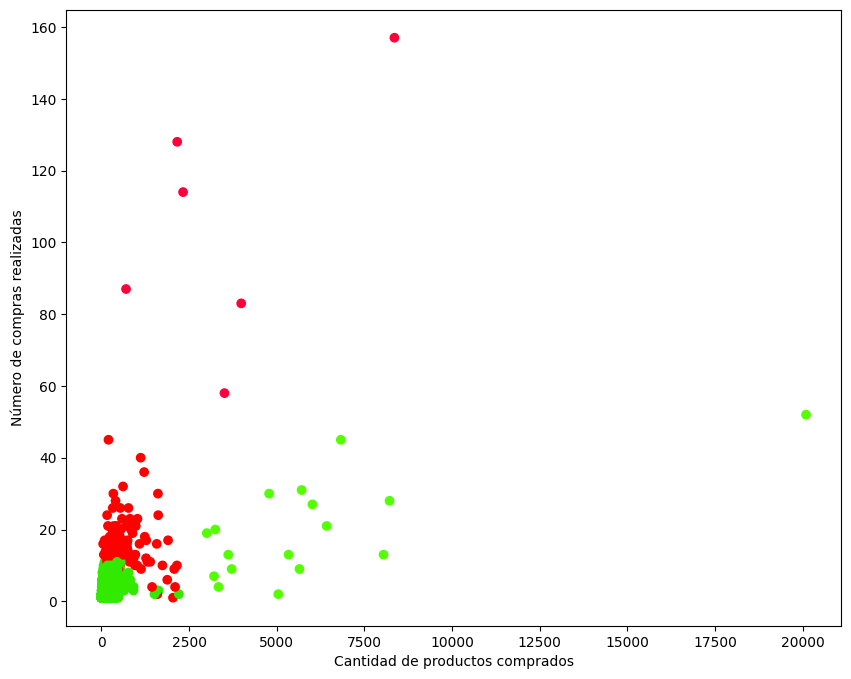

In [20]:
plt.figure(figsize=(10, 8))
plt.scatter(df_clientes["Quantity"], df_clientes["InvoiceNo"], c=clusters, cmap="prism")
plt.xlabel("Cantidad de productos comprados")
plt.ylabel("Número de compras realizadas")
plt.show()

In [21]:
from scipy.stats import zscore

# Calcular el Z-score de las columnas numéricas
z_scores = np.abs(zscore(df_clientes[['total_spent', 'Quantity', 'InvoiceNo']]))

# Verifica cuántos puntos tienen un Z-score mayor a 3
outliers = (z_scores > 3).all(axis=1)  # Si el Z-score es mayor a 3 en todas las columnas
outliers_count = np.sum(outliers)
print(f"Cantidad de outliers: {outliers_count}")

# Filtra los outliers si lo deseas
df_clientes_no_outliers = df_clientes[~outliers]

Cantidad de outliers: 12


In [22]:
'''#Creamos un nuevo dataframe solo con variable con la Quantity y el UnitPrice
df_clustering = df[["Quantity", "UnitPrice"]]

#Extraeremos el mes y el año a InvoiceDate
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

#Agregamos estas nuevas columnas al dataframe
df_clustering = df[["Quantity", "UnitPrice", "Year", "Month"]]'''

'#Creamos un nuevo dataframe solo con variable con la Quantity y el UnitPrice\ndf_clustering = df[["Quantity", "UnitPrice"]]\n\n#Extraeremos el mes y el año a InvoiceDate\ndf["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])\ndf["Year"] = df["InvoiceDate"].dt.year\ndf["Month"] = df["InvoiceDate"].dt.month\n\n#Agregamos estas nuevas columnas al dataframe\ndf_clustering = df[["Quantity", "UnitPrice", "Year", "Month"]]'

In [23]:
'''# Tomamos una muestra aleatoria de los datos, por ejemplo, el 10%
df_sample = df.sample(frac=0.1, random_state=42)

# Ahora seleccionamos las columnas para el clustering de la muestra
df_sample_clustering = df_sample[['Quantity', 'UnitPrice']]'''

"# Tomamos una muestra aleatoria de los datos, por ejemplo, el 10%\ndf_sample = df.sample(frac=0.1, random_state=42)\n\n# Ahora seleccionamos las columnas para el clustering de la muestra\ndf_sample_clustering = df_sample[['Quantity', 'UnitPrice']]"

In [24]:
'''#Escalamos y estandarizamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample_clustering)'''

'#Escalamos y estandarizamos los datos\nscaler = StandardScaler()\ndf_scaled = scaler.fit_transform(df_sample_clustering)'

In [25]:
'''#Creamos el dendrograma con linkage
z = linkage(df_scaled, method="ward", metric="euclidean")'''

'#Creamos el dendrograma con linkage\nz = linkage(df_scaled, method="ward", metric="euclidean")'

In [26]:
'''plt.figure(figsize=(10,7))
dendrogram(z)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Índice de los puntos de los datos")
plt.ylabel("Distancia")
plt.show()''''

SyntaxError: unterminated string literal (detected at line 6) (809349712.py, line 6)